In [1]:
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import modplot

In [133]:
import matplotlib
print(matplotlib.__version__)

3.1.3


In [152]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.ioff()

In [108]:
# location of the data
aleph_path = '/callisto/ALEPH'
# distributions to loop over
# only look at the events not passing the event selection
detectorDists = {'Thrust':[],
                 '1-Thrust':[],
                 'log(1-Thrust)':[],
                 'Energy':[],
                 'px':[],
                 'py':[],
                 'pz':[],
                 'pt':[],
                 'pmag':[],
                 'eta':[],
                 'pwflag':[],
                 'mass':[],
                 'charge':[],
                 'ntpc':[],
                 'missP':[]
                }

dists = copy.deepcopy(detectorDists)
for key in detectorDists.keys():
    dists[key+'_BeforeEventSelection'] = []
    dists[key+'_NotPassingEventSelection'] = []
    dists[key+'_PassingEventSelection'] = []
    dists.pop(key)
detectorDists = dists
    
# LEP years to loop over
years = ['1992','1993','1994','1995']
years_MC = ['1994']
# Event selections to apply
eSels = ['passesNTupleAfterCut',
         'passesTotalChgEnergyMin', 
         'passesNTrkMin', 
         'passesNeuNch',
         'passesSTheta']

In [109]:
# Load the data

for year in years:
    print(year)
    data_file = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
    event_mask = np.ones(len(data_file['t']['EventNo'])) 
    for eSel in eSels:
        event_mask *= data_file['t'][eSel].array() 
    
    for key in detectorDists.keys():
        #print(key)
        # Determine which distribution and selection to find
        dist, whichSel = key.split("_")[0], key.split("_")[-1]
       
        # Determine the event mask
        if 'BeforeEventSelection' in key:
            e_mask = np.ones(len(data_file['t']['EventNo']))
        elif 'NotPassingEventSelection' in key:
            e_mask = (np.array(event_mask)+1)%2
        elif 'PassingEventSelection' in key:
            e_mask = event_mask
        e_mask = np.array(e_mask).astype(bool)
    
        # Fill the data dictionary 
        if dist == '1-Thrust':
            detectorDists[key].append((1 - data_file['t']['Thrust'].array())[e_mask])
        elif dist == 'log(1-Thrust)':
            detectorDists[key].append(np.log(1 - data_file['t']['Thrust'].array())[e_mask]) 
        else:
            detectorDists[key].append(data_file['t'][dist].array()[e_mask])

1992
1993
1994
1995


In [110]:
# Load the MC

for year in years_MC:
    data_file = uproot.open(os.path.join(aleph_path, 'alephMCRecoAfterCutPaths_{}.root'.format(year)))
    event_mask = np.ones(len(data_file['t']['EventNo'])) 
    for eSel in eSels:
        event_mask *= data_file['t'][eSel].array() 
        
    for key in detectorDists.keys():
        
        # Determine which distribution and selection to find
        dist, whichSel = key.split("_")[0], key.split("_")[-1]
       
        # Determine the event mask
        if 'BeforeEventSelection' in key:
            e_mask = np.ones(len(data_file['t']['EventNo']))
        elif 'NotPassingEventSelection' in key:
            e_mask = (np.array(event_mask)+1)%2
        elif 'PassingEventSelection' in key:
            e_mask = event_mask
        e_mask = np.array(e_mask).astype(bool)
    
        # Fill the data dictionary 
        if dist == '1-Thrust':
            detectorDists[key].append((1 - data_file['t']['Thrust'].array())[e_mask])
        elif dist == 'log(1-Thrust)':
            detectorDists[key].append(np.log(1 - data_file['t']['Thrust'].array())[e_mask]) 
        else:
            detectorDists[key].append(data_file['t'][dist].array()[e_mask])    

In [111]:
#a = detectorDists['pwflag_NotPassingEventSelection'][0].flatten()

for year in detectorDists['pwflag_NotPassingEventSelection']:
    print(len(year))
    unique, counts = np.unique(year.flatten(), return_counts=True)
    print(dict(zip(unique, counts)))        

405
{0: 5993, 1: 199, 2: 81, 3: 1, 4: 2825, 5: 1465}
15281
{0: 228772, 1: 8058, 2: 2508, 3: 37, 4: 108716, 5: 53786}
39089
{0: 584353, 1: 20433, 2: 6332, 3: 77, 4: 267194, 5: 138829}
16832
{0: 251538, 1: 8653, 2: 2820, 3: 40, 4: 117493, 5: 59038}
19736
{0: 319771, 1: 9195, 2: 2987, 3: 254, 4: 151084, 5: 74553}


In [206]:
# Compute psum and esum 

for sel in ['BeforeEventSelection','NotPassingEventSelection','PassingEventSelection']:
    print(sel)
    detectorDists['pxsum_'+sel] = []
    detectorDists['pysum_'+sel] = []
    detectorDists['pzsum_'+sel] = []
    detectorDists['esum_'+sel] = []
    for year in range(5):
        print(year)
        detectorDists['pxsum_'+sel].append([])
        detectorDists['pysum_'+sel].append([])
        detectorDists['pzsum_'+sel].append([])
        detectorDists['esum_'+sel].append([])
        for event in range(len(detectorDists['px_'+sel][year])):
            detectorDists['pxsum_'+sel][year].append(np.sum(detectorDists['px_'+sel][year][event]))
            detectorDists['pysum_'+sel][year].append(np.sum(detectorDists['py_'+sel][year][event]))
            detectorDists['pzsum_'+sel][year].append(np.sum(detectorDists['pz_'+sel][year][event]))
            
            temp = 0
            temp += np.sqrt(detectorDists['pmag_'+sel][year][event]**2 + detectorDists['mass_'+sel][year][event]**2)
            detectorDists['esum_'+sel][year].append(np.sum(temp))
        

BeforeEventSelection
0
1
2
3
4
NotPassingEventSelection
0
1
2
3
4
PassingEventSelection
0
1
2
3
4


In [223]:
# histogram settings 
hist_style1 = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
hist_style2 = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
colors = ['purple','blue','green','orange','black']
obs = {}

obs.setdefault('esum', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 160, 'nbins_mc': 160,
    'yscale': 'linear',
    'xlim': (0, 160), 'ylim': (0,0.1), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'$\sum E_{i}$', 'symbol': r'$\sum E_{i}$',
    'ylabel': r'Events', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.5, 0.9),
    'legend_loc': 'upper left', 'legend_ncol': 1
})

obs.setdefault('pxsum', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 80, 'nbins_mc': 80,
    'yscale': 'log',
    'xlim': (-40, 40), 'ylim': (0, 0.2), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'$\sum p_{x}$', 'symbol': r'$\sum p_{x}$',
    'ylabel': r'Events', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.5, 0.9),
    'legend_loc': 'upper left', 'legend_ncol': 1
})

obs.setdefault('pysum',{}).update(copy.deepcopy(obs['pxsum']))
obs['pysum']['xlabel'] = r'$\sum p_{y}$'
obs['pysum']['symbol'] = r'$\sum p_{y}$'

obs.setdefault('pzsum',{}).update(copy.deepcopy(obs['pxsum']))
obs['pzsum']['xlabel'] = r'$\sum p_{z}$'
obs['pzsum']['symbol'] = r'$\sum p_{z}$'

obs.setdefault('missP', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 50, 'nbins_mc': 50,
    'yscale': 'linear',
    'xlim': (0,50), 'ylim': (10**-2, 0.2), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'Miss p', 'symbol': r'Miss p',
    'ylabel': r'Events', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.5, 0.9),
    'legend_loc': 'lower right', 'legend_ncol': 1
})

# calculate quantities to be stored in obs
for obkey,ob in obs.items():
    
    # setup bins
    ob['bins_det'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_det']+1)
    ob['bins_mc'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_mc']+1)
    ob['midbins_det'] = (ob['bins_det'][:-1] + ob['bins_det'][1:])/2
    ob['midbins_mc'] = (ob['bins_mc'][:-1] + ob['bins_mc'][1:])/2
    ob['binwidth_det'] = ob['bins_det'][1] - ob['bins_det'][0]
    ob['binwidth_mc'] = ob['bins_mc'][1] - ob['bins_mc'][0]

upper left


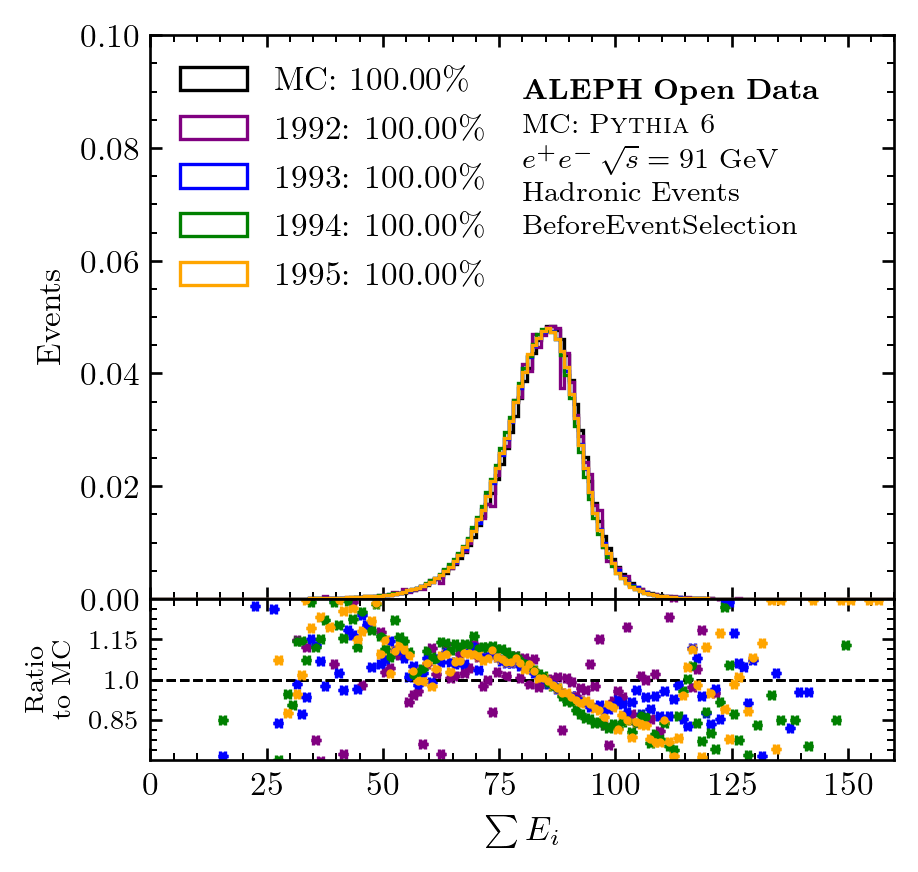

upper left


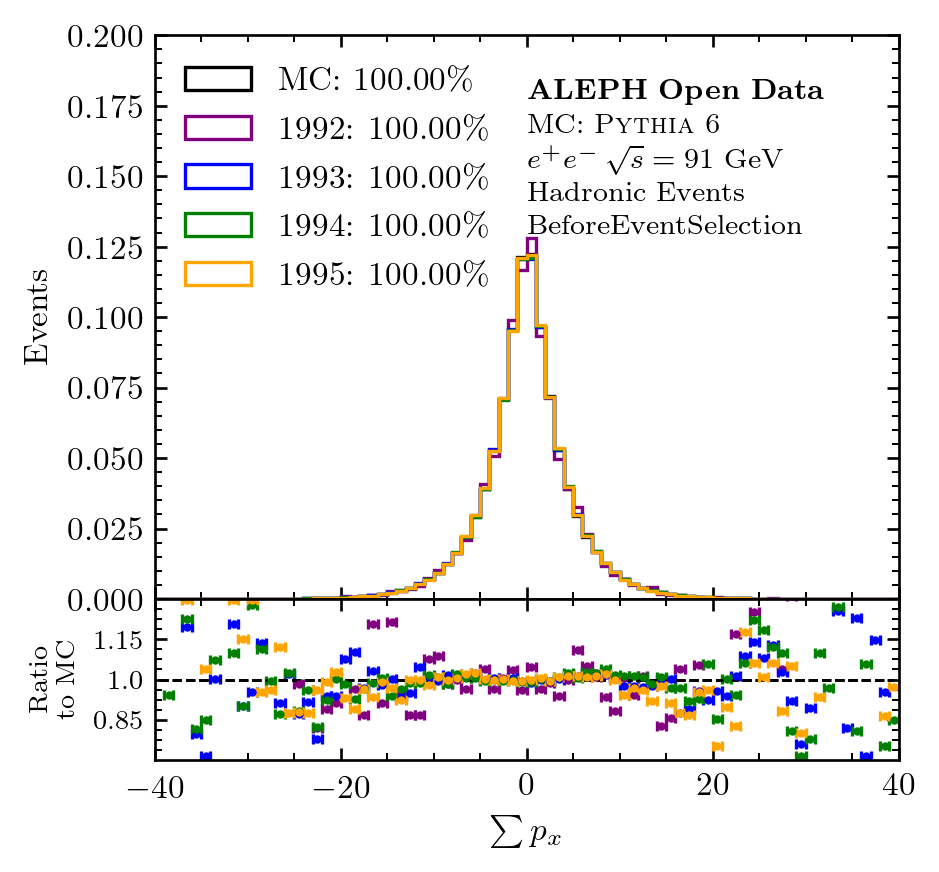

upper left


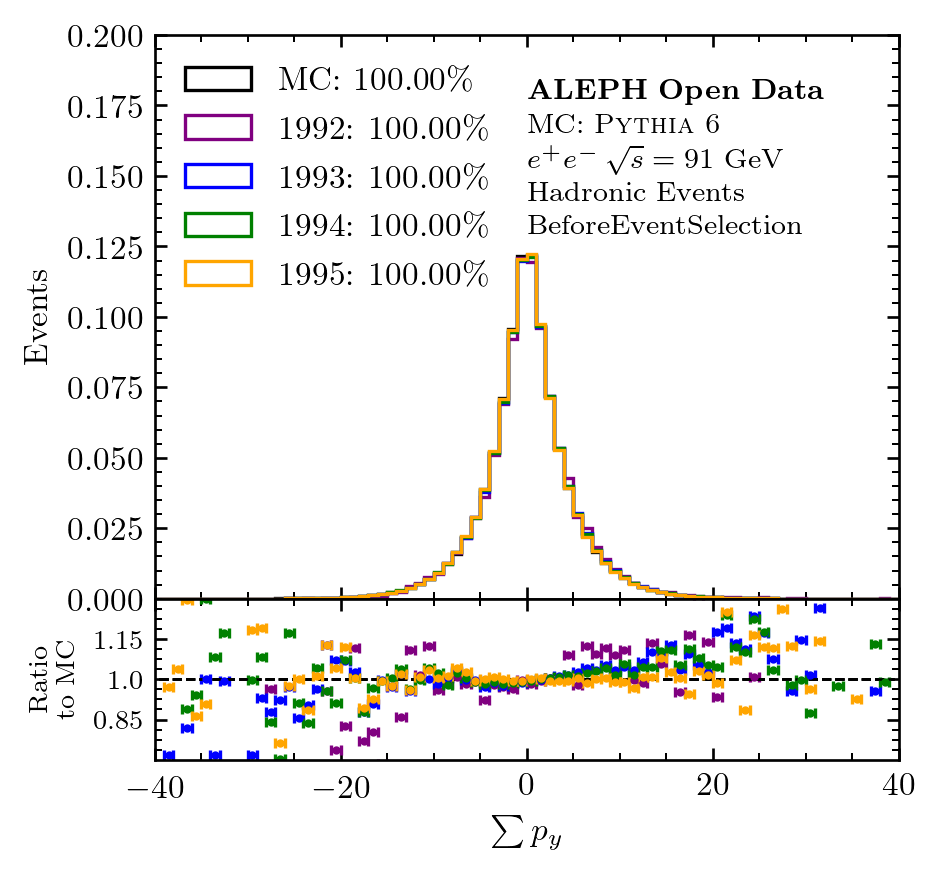

upper left


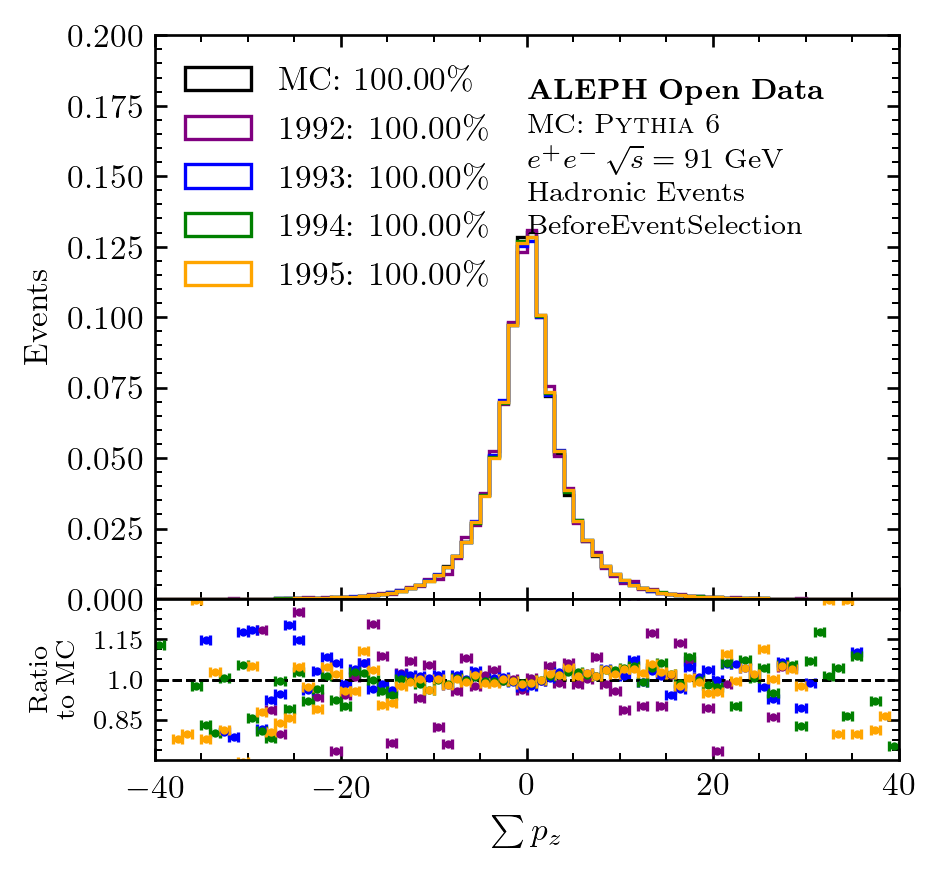

lower right


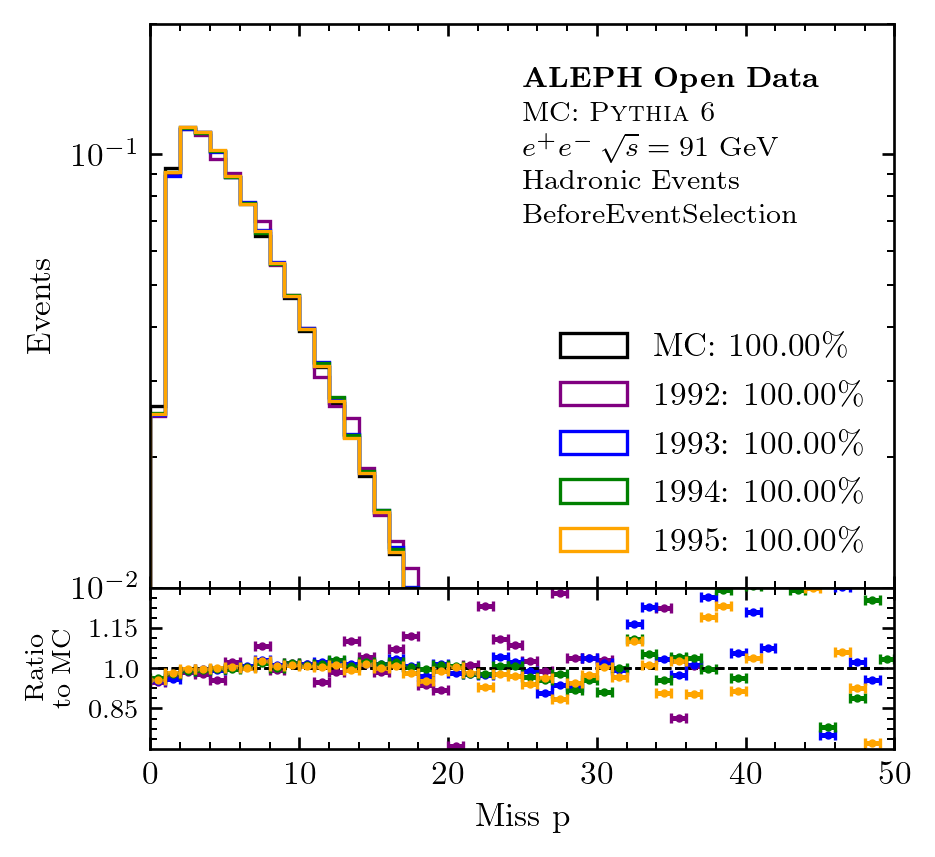

upper left


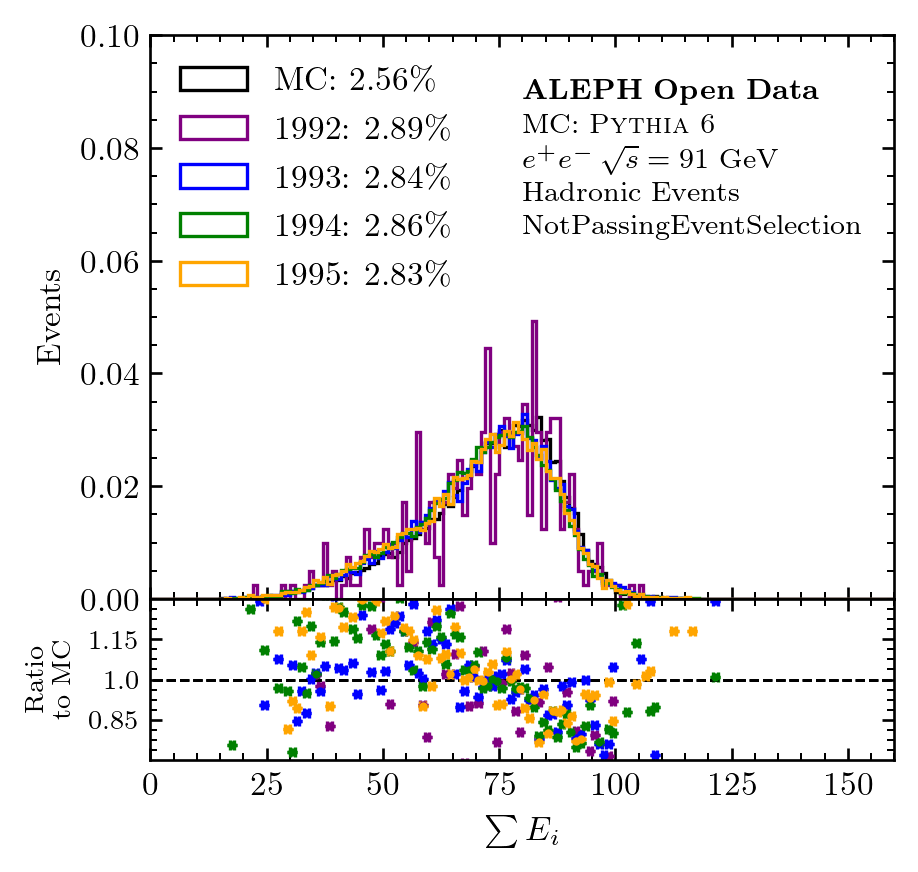

upper left


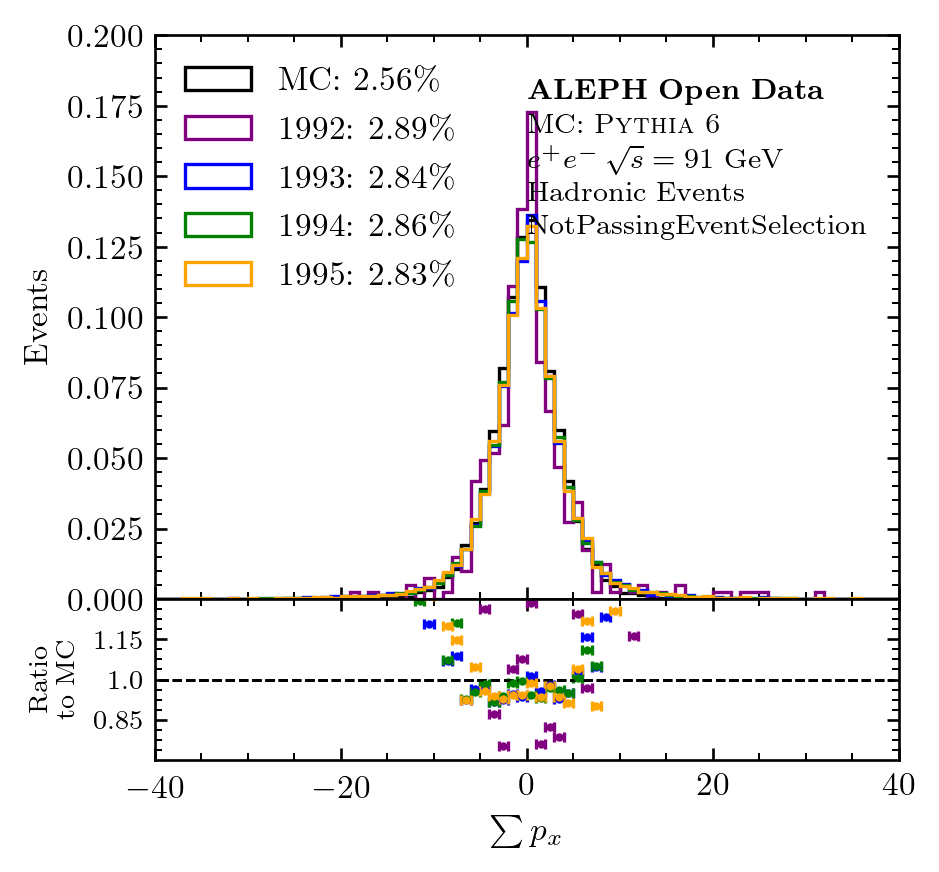

upper left


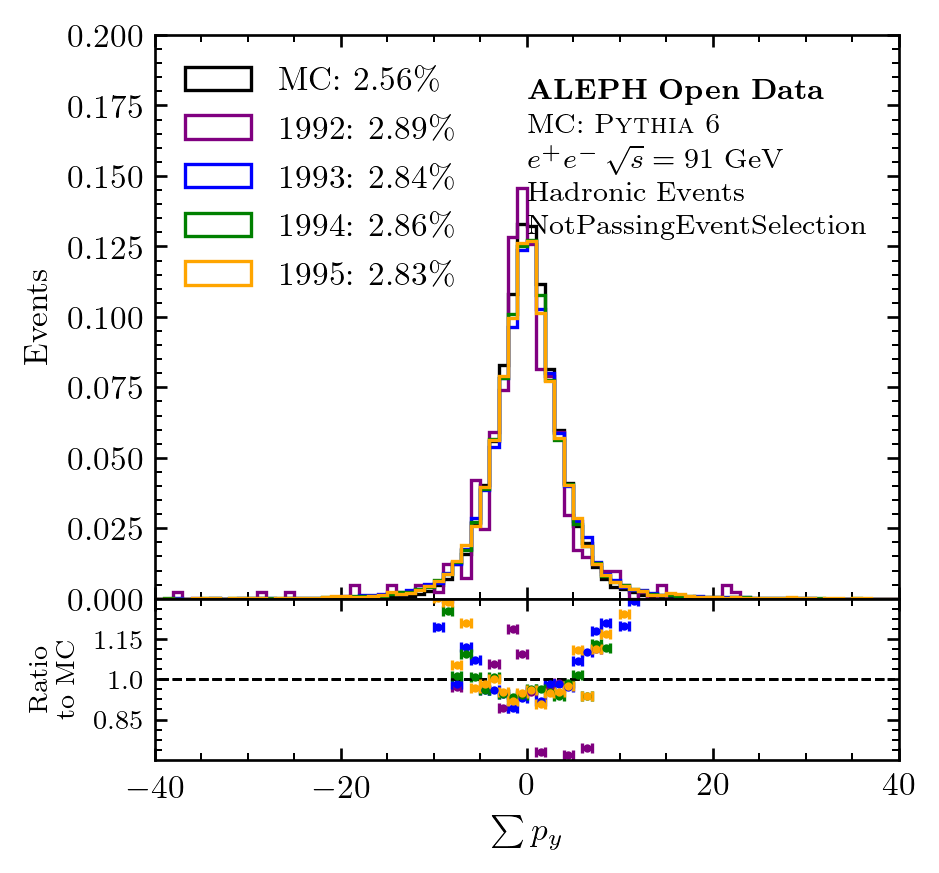

upper left


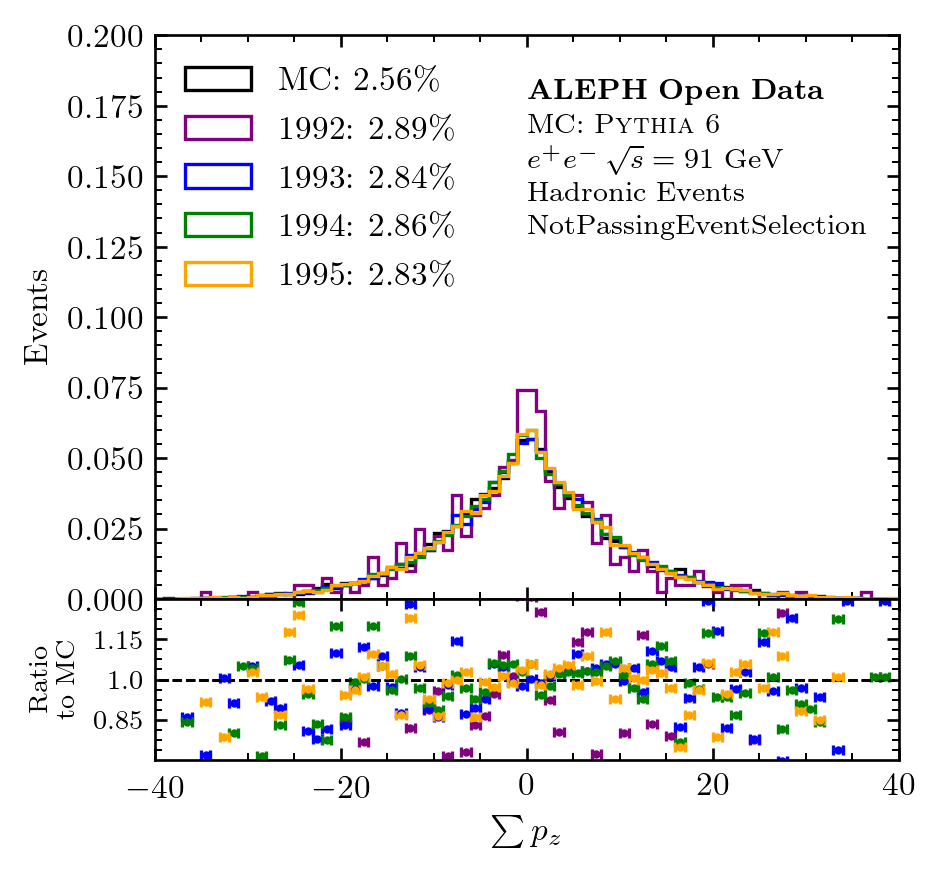

lower right


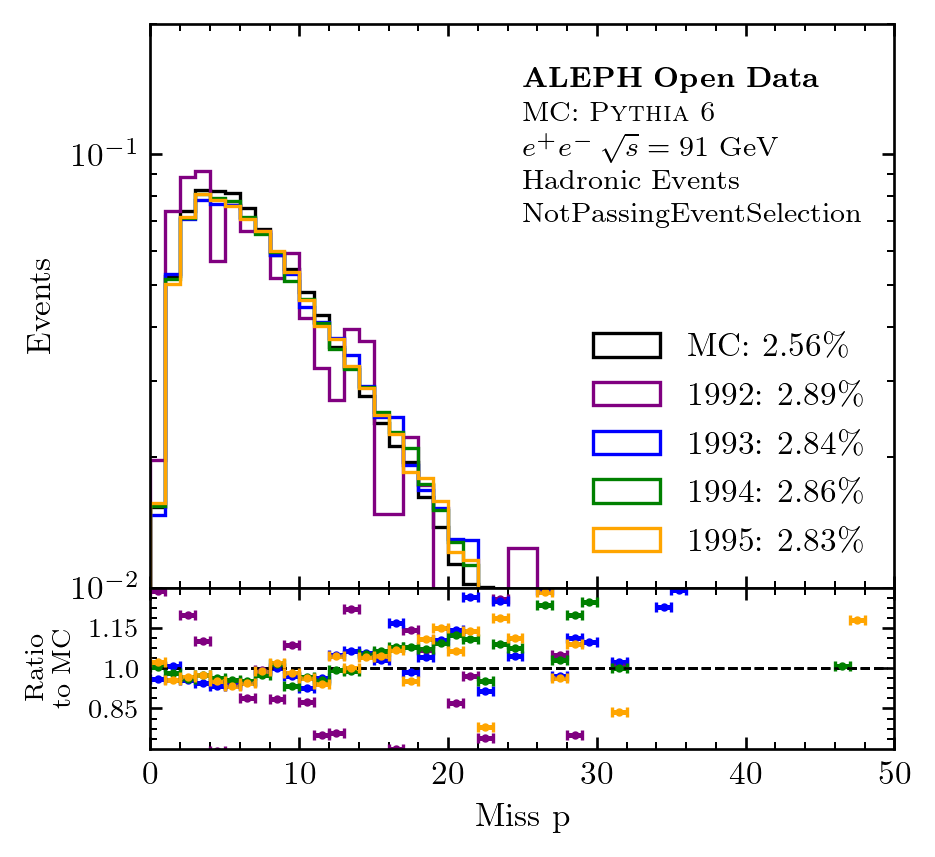

upper left


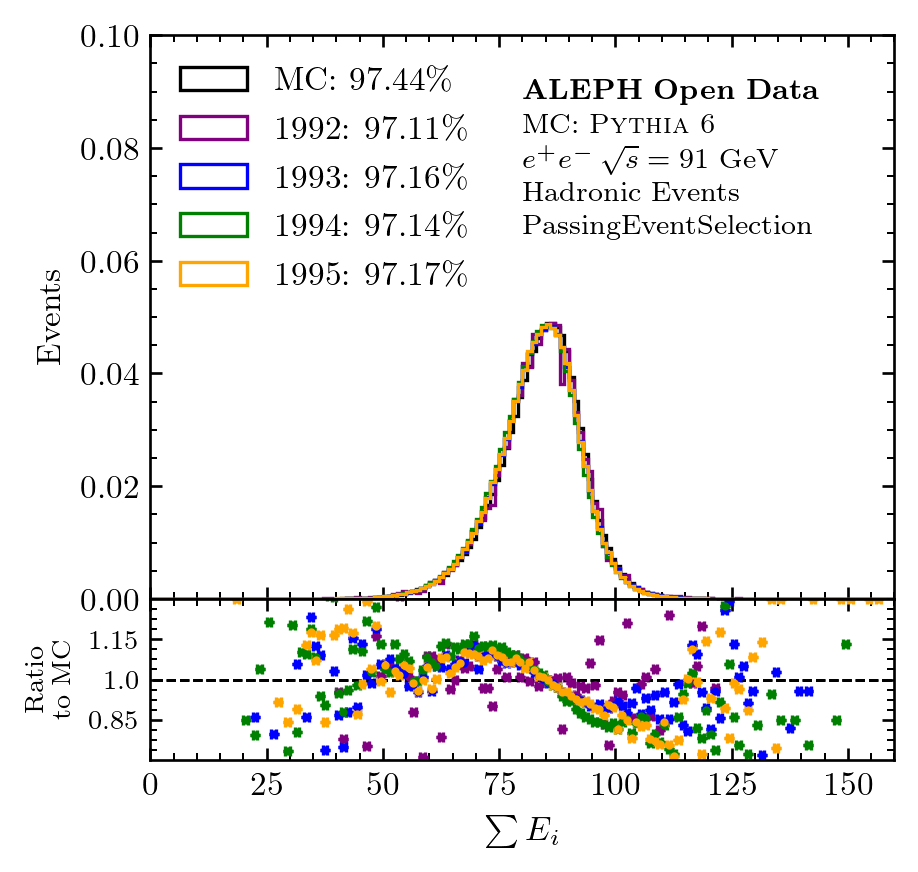

upper left


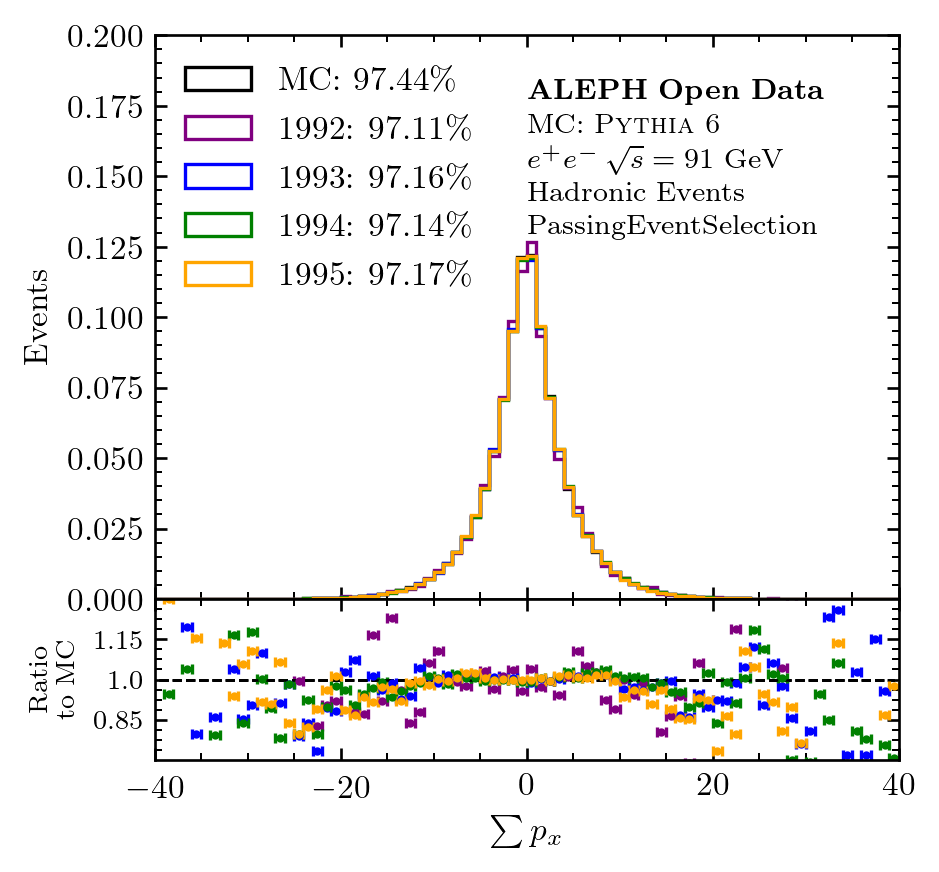

upper left


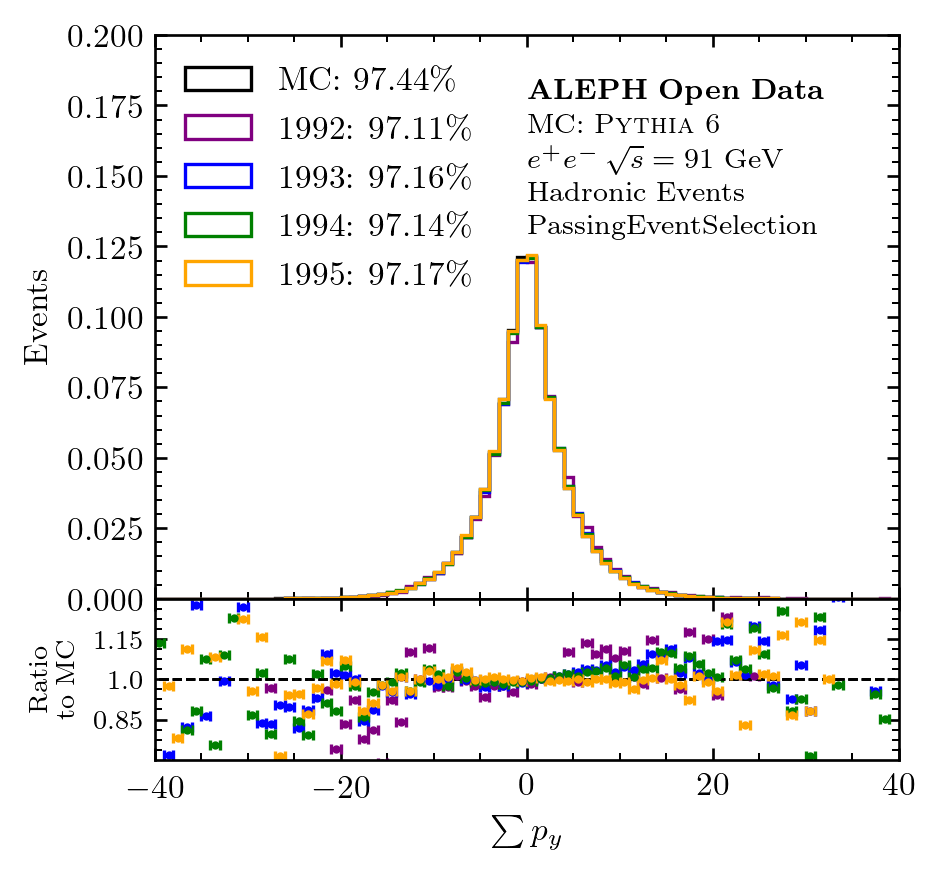

upper left


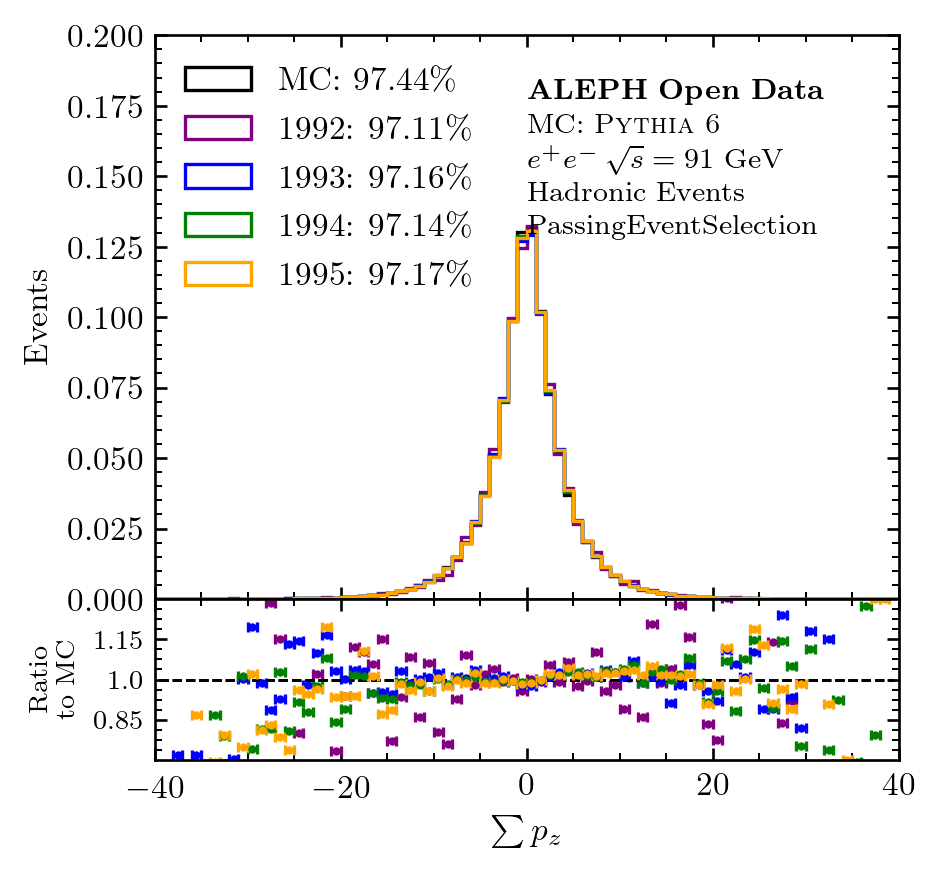

lower right


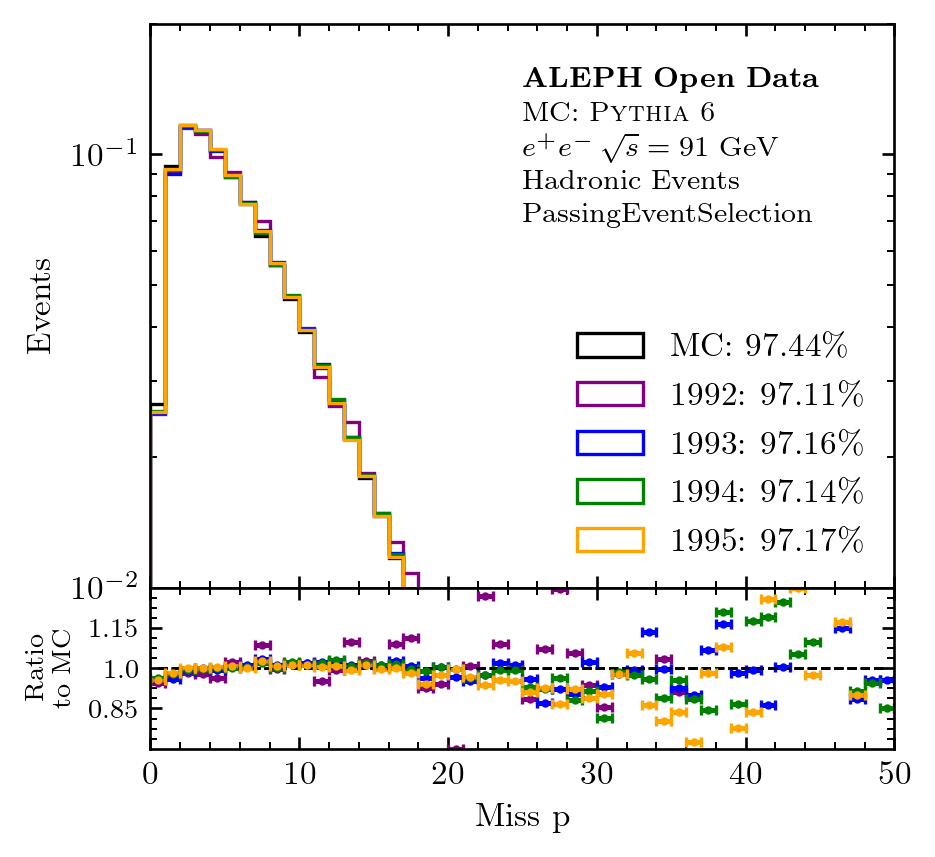

In [227]:
# Plot the detector data
iRef = 4 # index of 1994 MC data
#for key in detectorDists.keys():
NBefore = [float(len(detectorDists['esum_BeforeEventSelection'][i])) for i in range(5)]
for sel in ['BeforeEventSelection','NotPassingEventSelection','PassingEventSelection']:
    for obkey, ob in obs.items():
        # get the styled axes on which to plot
        fig, [ax0, ax1] = modplot.axes(**ob)
            
        # plot the reference MC level distribution
        perc = len(detectorDists[obkey+'_'+sel][iRef])/NBefore[iRef] *100
        histRef, binsRef, patchesRef = ax0.hist(detectorDists[obkey+'_'+sel][iRef], ob['bins_det'], color=colors[iRef],**hist_style1, label=r'MC: {:0.2f}\%'.format(perc))
        # plot the LEP years
        for year in range(len(years)):   
            perc = len(detectorDists[obkey+'_'+sel][year])/NBefore[year] * 100
            hist, bins, patches = ax0.hist(detectorDists[obkey+'_'+sel][year], ob['bins_det'], color=colors[year],**hist_style1, label=r'{}: {:0.2f}\%'.format(years[year],perc))
            # Plot the Ratios of the Detector level distributions to 1994 year
            ratio = hist/(histRef+10**-50)
            # errors not yet calculated
            ratio_errs = [0]*len(hist)
            ax1.plot([np.min(ob['midbins_det']), np.max(ob['midbins_det'])], [1, 1], '--', color='black', lw=0.75)
            ax1.errorbar(ob['midbins_det'], ratio, xerr=ob['binwidth_det']/2, yerr=ratio_errs, color=colors[year], **modplot.style('errorbar'))
        
        if obkey == 'missP': ax0.set_yscale('log')
        ax1.set_ylabel("Ratio \n to MC".format(years[year]))
        # legend style and ordering
        print(ob['legend_loc'])
        loc, ncol = ob['legend_loc'], 1
        order = range(5)
        modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

        # stamp to put on the plots
        
        modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
                      line_0=r'\textbf{ALEPH Open Data}',
                      line_1=r'MC: \textsc{Pythia 6}',
                      line_2=r'$e^+e^-\,\sqrt{s}=91$ GeV',
                      line_3='Hadronic Events',
                      line_4=sel) 

        # save plot (by default in the same directory as this notebook).
        # If running on binder, the plot can be accessed by first going to the jupyter file browser
        # (which itself can be accessed by copying the URL of this notebook and removing the name of the notebook
        # after the final "/"), selecting the square next to the name of the plot, and clicking "Download".
        path = os.path.join(os.getcwd(),'NotPassingSelStudies')
        figname = '{}_DetectorLevel_Ratio{}toPythia6MC1994'.format(obkey+'_'+sel,years[year])
        #fig.savefig(os.path.join(path,figname), bbox_inches='tight')
        modplot.save(fig, figname, add_watermark=True, tx=221.5, ty=251.5, plots_dir='NotPassingSelStudies')
        #plt.close(fig)
        plt.show()

In [228]:
!tar -czvf NotPassingSelStudies.zip NotPassingSelStudies

NotPassingSelStudies/
NotPassingSelStudies/pzsum_BeforeEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.pdf
NotPassingSelStudies/pzsum_PassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.png
NotPassingSelStudies/pysum_BeforeEventSelection_DetectorLevel_Ratio1995toPythia6MC1994_logo.pdf
NotPassingSelStudies/pysum_PassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.pdf
NotPassingSelStudies/pxsum_NotPassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994_logo.pdf
NotPassingSelStudies/pzsum_NotPassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.pdf
NotPassingSelStudies/pysum_PassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.png
NotPassingSelStudies/pysum_NotPassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.pdf
NotPassingSelStudies/esum_BeforeEventSelection_DetectorLevel_Ratio1995toPythia6MC1994.pdf
NotPassingSelStudies/pzsum_NotPassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994_logo.pdf
NotPassingSelStudies/pzsum_PassingE